# **Go-To-Market Strategy Analysis On Cab Company Investment**
---

## Project Description:


#### XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.


## Data Set:

#### You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

* Cab_Data.csv – this file includes details of transaction for 2 cab companies

* Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

* Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

* City.csv – this file contains list of US cities, their population and number of cab users




## Step 1. Data import, clean and analyze datasets

In [111]:
# Import all libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import datetime
import holoviews as hv
import hvplot.pandas
import xlrd
import matplotlib.pyplot as plt

### Imort and clean Cab Data

In [2]:
# Upload datasets into notebook, then store in a Pandas DataFrame
#read the file
cab_df = pd.read_csv(Path('DataSets/Cab_Data.csv'))

#print the head
display(cab_df.head())
print('Data shape: ',cab_df.shape)

# If use google colab 
# from google.colab import files
# uploaded = files.upload()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


Data shape:  (359392, 7)


In [3]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [4]:
# Convert exel date to datetime format
def convert_date(xl_date):
    return xlrd.xldate.xldate_as_datetime(xl_date, 0)
cab_df['Date of Travel'] = pd.to_datetime(cab_df['Date of Travel'].apply(convert_date), format='%Y-%m-%d')
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
# Check duplicates
cab_df.duplicated().sum()

0

`There's no need to check null values, since dataframe shape shows that the cab_df has 359392 rows and the info table above shows all 7 culumns give 359392 non-null values.`

In [6]:
# Summarize view of columns with numirical information
cab_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [7]:
# Check unique values
display(cab_df['Company'].unique())
display(cab_df['City'].unique())

array(['Pink Cab', 'Yellow Cab'], dtype=object)

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [8]:
# City counts
cab_df['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

### Imort and clean City Data

In [9]:
# Upload datasets into notebook, then store in a Pandas DataFrame
#read the file
city_df = pd.read_csv(Path('DataSets/City.csv'))

#print the head
display(city_df.head())
print('Data shape: ',city_df.shape)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


Data shape:  (20, 3)


> <b> Please notice: San Francisco is in the City Data dataframe but there's no San Francisco data in the Cab dataframe </b>

In [10]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [11]:
# Check duplicates
city_df.duplicated().sum()

0

`There's no need to check null values, since dataframe shape shows that the city_df has 20 rows and the info table above shows all 3 culumns give 20 non-null values.`

In [12]:
# Summarized view of city dataframe
city_df.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [13]:
# Change data types for Population and Users columns to int
city_df['Population'] = [x.replace(',','') for x in city_df['Population']]
city_df['Population'] = city_df['Population'].astype(int)

city_df['Users'] = [x.replace(',','') for x in city_df['Users']]
city_df['Users'] = city_df['Users'].astype(int)

city_df.dtypes

City          object
Population     int64
Users          int64
dtype: object

In [14]:
# Summarize view of columns with numirical information
city_df.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


### Imort and clean Customer ID Data

In [17]:
# Upload datasets into notebook, then store in a Pandas DataFrame
#read the file
customer_id_df = pd.read_csv(Path('DataSets/Customer_ID.csv'))

#print the head
display(customer_id_df.head())
print('Data shape: ',customer_id_df.shape)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


Data shape:  (49171, 4)


In [18]:
customer_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [19]:
# Check duplicates
customer_id_df.duplicated().sum()

0

`There's no need to check null values, since dataframe shape shows that the customer_id_df has 49171 rows and the info table above shows all 4 culumns give 49171 non-null values.`

In [20]:
# Summarized view of numirical columns in customer ID dataframe
customer_id_df[['Age','Income (USD/Month)']].describe()

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


In [21]:
# Customer gender counts
customer_id_df['Gender'].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

### Imort and clean Transaction ID Data

In [22]:
# Upload datasets into notebook, then store in a Pandas DataFrame
#read the file
tran_id_df = pd.read_csv(Path('DataSets/Transaction_ID.csv'))

#print the head
display(tran_id_df.head())
print('Data shape: ',tran_id_df.shape)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


Data shape:  (440098, 3)


In [23]:
tran_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [24]:
# Check duplicates
tran_id_df.duplicated().sum()

0

`There's no need to check null values, since dataframe shape shows that the customer_id_df has 440098 rows and the info table above shows all 3 culumns give 440098 non-null values.`

In [25]:
# Summarized view of Payment type in Transaction ID dataframe
tran_id_df['Payment_Mode'].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

### Merge data

In [26]:
# Print culumns of each data frame
print(cab_df.columns)
print(city_df.columns)
print(customer_id_df.columns)
print(tran_id_df.columns)

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')
Index(['City', 'Population', 'Users'], dtype='object')
Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')
Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')


In [27]:
# Merge dataframes
df= cab_df.merge(tran_id_df, on= 'Transaction ID').merge(customer_id_df, on ='Customer ID').merge(city_df, on = 'City')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [28]:
# Adding profit margin column
df['Profit Margin'] = df['Price Charged'] - df['Cost of Trip']

In [29]:
# Categorize the year, month, and day of the week of travel

year = []
month = []
for i in range(len(df['Date of Travel'])):
    year.append(df['Date of Travel'][i].year)
    month.append(df['Date of Travel'][i].month)
df['Year'] = year
df['Month'] = month
df['Day of Week'] = df['Date of Travel'].dt.day_name()
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit Margin,Year,Month,Day of Week
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150,2016,1,Friday
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772,2018,7,Saturday
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480,2018,11,Friday
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660,2016,1,Wednesday
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808,2018,4,Saturday


<AxesSubplot:>

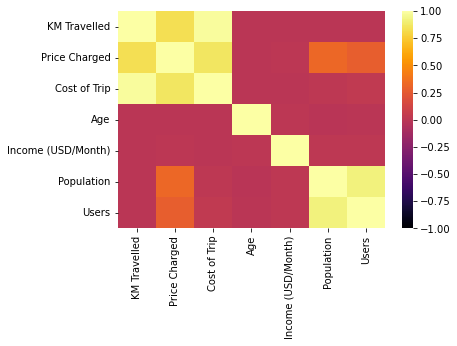

In [30]:
# Find correlations of each aspects
corr_df = df[['KM Travelled','Price Charged', 'Cost of Trip', 'Age','Income (USD/Month)', 'Population','Users']].corr()
# Use Seaborn heatmap to visualize the correlation
sns.heatmap(corr_df, vmin = -1, vmax=1, cmap='inferno')

> <b> We can see from the above image that Age, Income, Population, Users, KM Travelled, Price Charged, and Cost of Trip have positive correlation with each other </b>

## Step 2. Data investigation and visualization

### Yellow VS. Pink

> Total transactions by company


> Which city cost more for each company by KM? 
Ave cost per KM by company by city

How many cabs from each company in each city?

which company in which city has the highest profit margin?
earning margin or (total price charged by city - total cost by city) by company -- side by side overlay bar

dominent cities by company-- geoview


dominent age group by company -- box
dominent income group by company -- box


In [31]:
# Total rides from 2016-2018
df['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

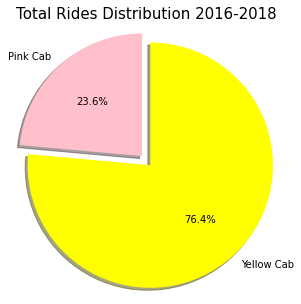

In [145]:
# Using pie chart graph the ride distribution between the two companies
labels = 'Pink Cab', 'Yellow Cab'
sizes = [84711, 274681]
colors = ['pink', 'yellow']
explode = (0,0.1)
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors = colors)
ax1.axis('equal')

plt.title('Total Rides Distribution 2016-2018', fontsize = 15)
plt.show()

> <b> During the analyzing period, more than 4 times of the rides were taken in `Yellow cab` than in Pink cab.</b>

In [176]:
# Create a new dataframe group all data by city and by company and find average values of each category
df_by_ct_co_avg = df.groupby(['City','Company']).mean()
# Create a new column containing cost per km information
df_by_ct_co_avg['Cost per KM'] = df_by_ct_co_avg['Cost of Trip']/df_by_ct_co_avg['KM Travelled']
df_by_ct_co_avg.head()

Transaction ID  KM Travelled  Price Charged  \
City       Company                                                   
ATLANTA GA Pink Cab      1.021965e+07     22.539824     302.131555   
           Yellow Cab    1.022087e+07     22.248247     422.413446   
AUSTIN TX  Pink Cab      1.023399e+07     21.969176     320.435070   
           Yellow Cab    1.022852e+07     22.512840     422.248940   
BOSTON MA  Pink Cab      1.022321e+07     22.740746     300.551489   

                       Cost of Trip   Customer ID        Age  \
City       Company                                             
ATLANTA GA Pink Cab      247.619594  28504.842225  35.321793   
           Yellow Cab    293.615723  28489.815531  35.306816   
AUSTIN TX  Pink Cab      241.502901  34513.518737  35.672377   
           Yellow Cab    296.999358  34522.128798  35.129458   
BOSTON MA  Pink Cab      250.030529  58514.572889  35.183571   

                       Income (USD/Month)  Population    Users  Profit Margin  \
City       Company                                                              
ATLANTA GA Pink Cab          15033.438706    814885.0  24701.0      54.511961   
           Yellow Cab        14902.657981    814885.0  24701.0     128.797723   
AUSTIN TX  Pink Cab          14863.617773    698371.0  14978.0      78.932168   
           Yellow Cab        14593.396631    698371.0  14978.0     125.249582   
BOSTON MA  Pink Cab          15383.779213    248968.0  80021.0      50.520960   

                              Year     Month  Cost per KM  
City       Company                                         
ATLANTA GA Pink Cab    2017.046538  7.528944    10.985871  
           Yellow Cab  2017.050043  7.483693    13.197252  
AUSTIN TX  Pink Cab    2017.058351  8.579229    10.992807  
           Yellow Cab  2017.036988  8.232166    13.192443  
BOSTON MA  Pink Cab    2017.047243  7.766101    10.994825

In [178]:
# Create a new dataframe group all data by city and by company and find total values of each category
df_by_ct_co_sum = df.groupby(['City','Company']).sum()
df_by_ct_co_sum.head()

Transaction ID  KM Travelled  Price Charged  \
City       Company                                                   
ATLANTA GA Pink Cab       18007031833      39715.17      532355.80   
           Yellow Cab     59229968168     128928.59     2447885.92   
AUSTIN TX  Pink Cab       19117094048      41038.42      598572.71   
           Yellow Cab     30971960840      68168.88     1278569.79   
BOSTON MA  Pink Cab       53017566077     117933.51     1558660.02   

                       Cost of Trip  Customer ID     Age  Income (USD/Month)  \
City       Company                                                             
ATLANTA GA Pink Cab    4.363057e+05     50225532   62237            26488919   
           Yellow Cab  1.701503e+06    165098481  204603            86360903   
AUSTIN TX  Pink Cab    4.511274e+05     64471253   66636            27765238   
           Yellow Cab  8.993141e+05    104533006  106372            44188805   
BOSTON MA  Pink Cab    1.296658e+06    303456575  182462            79780279   

                       Population      Users  Profit Margin      Year  Month  
City       Company                                                            
ATLANTA GA Pink Cab    1435827370   43523162     96050.0760   3554036  13266  
           Yellow Cab  4722258575  143142295    746382.8056  11688805  43368  
AUSTIN TX  Pink Cab    1304557028   27978904    147445.2900   3767865  16026  
           Yellow Cab  2114667388   45353384    379255.7352   6107588  24927  
BOSTON MA  Pink Cab    1291148048  414988906    262001.6980  10460407  40275

In [177]:
# Compare how many KM travelled for each company and in which city traveled more
p = hv.render(df_by_ct_co_sum[['KM Travelled']].hvplot.bar( title = 'Total KM Traveled in Each City', width = 800, height = 700, color = ['pink', 'yellow']).opts(xrotation = 90,yformatter='%.0f'))
p.xaxis.group_label_orientation = 'vertical'
from bokeh.plotting import show
show(p)

> <b> `Yellow` cabs outrun Pink cabs by a huge amount especially in New York, Boston, Chicago, and DC </b>

> <b> `Pink` cabs has more advantage on the west coast cities such as Los Angeles, San Diego, Silicon Valley while `Yellow` cabs dominate the east coast </b>

> <b> We can't directly see the number of  </b>

> <b>  </b>

demand for cabs in each city
east vs west and mid

In [168]:
# Compare how much does it cost per KM travelled for each company and which city cost more or less
p1 = hv.render(df_by_city[['Cost per KM']].hvplot.bar( title = 'Average Cost Per KM', width = 900, height = 400, color = ['pink', 'yellow']).opts(xrotation = 90))
p1.xaxis.group_label_orientation = 'vertical'
from bokeh.plotting import show
show(p1)

> <b> The bar chart above shows it generally cost `$2` more every trip in all cities for `Yellow` cab than Pink cab </b>

> <b> The average cost per KM in all cities are generally the same </b>

In [167]:
p2 = hv.render(df_by_city['Profit Margin'].hvplot(kind = 'bar', stacked= True, legend = 'top_left', width = 600, height = 400, color = ['pink', 'yellow']).opts(xrotation = 90))
p2.xaxis.group_label_orientation = 'vertical'
show(p2)

### Users

In [ ]:
dominent gender by company-- pie
how many users in each city for each company?
age by city -- box
age by km traveled -- box
income by city, by km traveled
relationship of age and income

### Cities

In [ ]:
users out of population by city (by company?)-- overlay bar
ave km travelled by city 
user counts by city -- geoview
gender by city

### Dates

In [ ]:
Has rides for each company increased over the years in each city? groupby line graph and hvplot groupby selection -- demand of cabs in each city for each company
seasonal effects
quarterly total km travelled
quarterly profit margin

day of the week effects

### Payment method

In [ ]:
by city
by gender
by age group
by company
by income

In [ ]:
according to the VC's budget
if by Yellow cab pros and cons and what needs to happen: too many cars and maintenance, labor, management costs
if by Pink cab pros and cons and what needs to happen: increase number of cabs could be competitive as Pink cabs generally cost less per km travelld